In [8]:
# 이진화 실습
import cv2 as cv 
import numpy as np
import sys

def on_threshold(pos):
    _, dst  = cv.threshold(src, pos, 255, cv.THRESH_BINARY)
    cv.imshow('dst',dst)



def main():
    global src
    filename = '/Users/seph/Desktop/4-2/pythoncomvi/image_ex/neutrophils.png'
# 내가 만약 터미널로 실행을 했더라면 아래코드 사용
# if len(sys.argv) > 1:
#     filename = sys.argv[1]
    src = cv.imread(filename, cv.IMREAD_GRAYSCALE)
    if src is None:
        print("Image load failed!")
        exit()
        
    cv.imshow('src', src)
    cv.namedWindow('dst')
    cv.createTrackbar('Threshold', 'dst', 0, 255, on_threshold)
    cv.setTrackbarPos('Threshold', 'dst', 128)
    cv.waitKey()
    cv.destroyAllWindows()

if __name__ == "__main__":
    main()


In [2]:
# 적응형 이진화를 통해 수도쿠 사진 밝게 나타내기
import numpy as np
import cv2 as cv

def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0:
        bsize = bsize - 1
    if bsize < 3:
        bsize = 3
    dst = cv.adaptiveThreshold(src, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv.THRESH_BINARY, bsize, 5)
    cv.imshow('dst', dst)

def main():
    global src
    src = cv.imread('image_ex/sudoku.jpg', cv.IMREAD_GRAYSCALE)
    if src is None:
        print("Image load failed!")
        exit()
    
    cv.imshow('src', src)
    cv.namedWindow('dst')
    cv.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
    cv.waitKey()
    cv.destroyAllWindows()


if __name__ == "__main__":
    main()



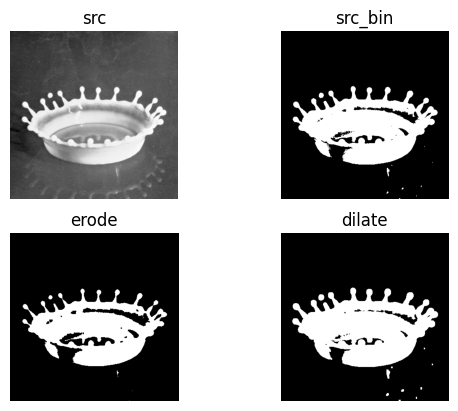

In [3]:
# 모폴로지 연산을 통한 침식과 팽창
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
def erode_dilate():
    src = cv.imread('image_ex/milkdrop.bmp', cv.IMREAD_GRAYSCALE)
    
    if src is None:
        print('Image load failed!')
        return
    _, src_bin = cv.threshold(src, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    
    dat1 = cv.erode(src_bin, None)
    dat2 = cv.dilate(src_bin, None)
    
    plt.subplot(221), plt.axis('off'), plt.imshow(src, 'gray'), plt.title('src')
    plt.subplot(222), plt.axis('off'), plt.imshow(src_bin, 'gray'), plt.title('src_bin')
    plt.subplot(223), plt.axis('off'), plt.imshow(dat1, 'gray'), plt.title('erode')
    plt.subplot(224), plt.axis('off'), plt.imshow(dat2, 'gray'), plt.title('dilate')
    plt.show()
erode_dilate()

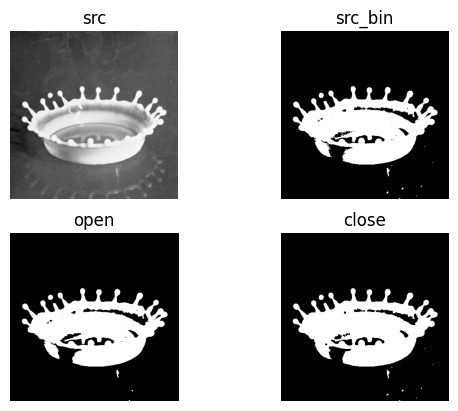

In [5]:
# 모폴로지 연산 침식 팽창 이용한 열기 닫기
import numpy as np
import cv2 as cv

def open_close():   
    src = cv.imread('image_ex/milkdrop.bmp', cv.IMREAD_GRAYSCALE)
    
    if src is None:
        print('Image load failed!')
        return
    _, src_bin = cv.threshold(src, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

    dat1 = cv.morphologyEx(src_bin, cv.MORPH_OPEN, None)
    dat2 = cv.morphologyEx(src_bin, cv.MORPH_CLOSE, None)
    
    plt.subplot(221), plt.axis('off'), plt.imshow(src, 'gray'), plt.title('src')
    plt.subplot(222), plt.axis('off'), plt.imshow(src_bin, 'gray'), plt.title('src_bin')
    plt.subplot(223), plt.axis('off'), plt.imshow(dat1, 'gray'), plt.title('open')
    plt.subplot(224), plt.axis('off'), plt.imshow(dat2, 'gray'), plt.title('close')
    plt.show()
    
open_close()